##Tugas Pagerank

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

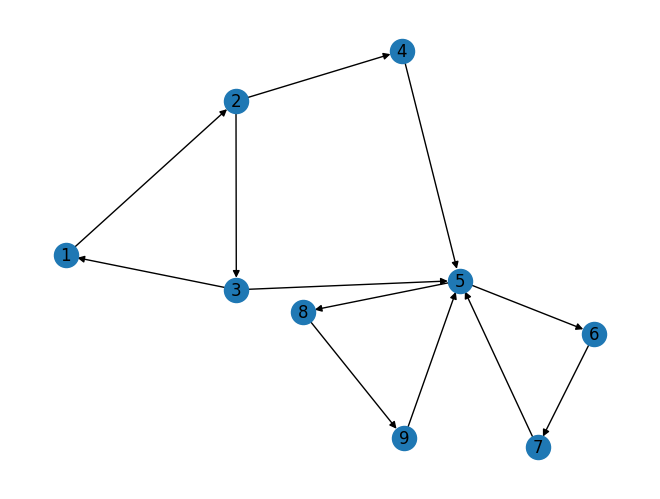

In [2]:
# membuat objek grafik kosong
G = nx.DiGraph()

# menambahkan node
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)
G.add_node(7)
G.add_node(8)
G.add_node(9)

# menambahkan edge
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(2, 4)
G.add_edge(3, 1)
G.add_edge(3, 5)
G.add_edge(4, 5)
G.add_edge(5, 6)
G.add_edge(5, 8)
G.add_edge(6, 7)
G.add_edge(7, 5)
G.add_edge(8, 9)
G.add_edge(9, 5)

nx.draw(G, with_labels=True)

In [3]:
# menghitung PageRank secara manual
d = 0.85 # faktor dampak
N = len(G.nodes()) # jumlah node
pr = {node: 1/N for node in G.nodes()} # nilai awal PageRank

for i in range(100): # melakukan iterasi hingga konvergen
    new_pr = {}
    for node in G.nodes():
        in_nodes = [n for n in G.predecessors(node)] # node yang mengarah ke node ini
        in_pr = sum([pr[n]/len(list(G.successors(n))) for n in in_nodes]) if in_nodes else 0 # PageRank dari node yang mengarah ke node ini
        new_pr[node] = (1-d)/N + d*in_pr # menghitung nilai PageRank baru untuk node ini
    pr = new_pr.copy()

print("Hitung Manual", pr)

Hitung Manual {1: 0.03161418146466325, 2: 0.04353872091163043, 3: 0.035170623054109604, 4: 0.035170623054109604, 5: 0.29524037855084734, 6: 0.142143819289085, 7: 0.1374889171932348, 8: 0.142143819289085, 9: 0.1374889171932348}


In [4]:
pr = nx.pagerank(G, alpha=0.85)
print("Hitung Networkx Pagerank", pr)

Hitung Networkx Pagerank {1: 0.03161418146466325, 2: 0.04353872091163043, 3: 0.035170623054109604, 4: 0.035170623054109604, 5: 0.2952422202251482, 6: 0.14214284729431512, 7: 0.13748896835085428, 8: 0.14214284729431512, 9: 0.13748896835085428}


In [5]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.1 MB/s eta 0:00:00


In [6]:
!pip install docx2txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3957 sha256=5cf712e1871a89a2586462310bad3ede8f0377eabeee50ce5a21fb091dd31914
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt


In [7]:
import numpy as np
import PyPDF2
import docx2txt
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
from nltk.tokenize.punkt import PunktSentenceTokenizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [8]:
def readDoc():
    name = input('Please input a file name: ') 
    print('You have asked for the document {}'.format(name))

    # now read the type of document
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
        # print(name)
    print(choice)
    # Case 1: if it is a .txt file
        
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
            
    # Case 2: if it is a .pdf file
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    # Case 3: none of the format
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(document))
    return document

In [9]:
def tokenize(document):
    # We are tokenizing using the PunktSentenceTokenizer
    # we call an instance of this class as sentence_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: takes our document as input and returns a list of all the sentences in the document
    
    # sentences is a list containing each sentence of the document as an element
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

In [11]:
def readDoc(story):
    with open(story, 'r') as file:
        document = file.read()
    return document

document = readDoc('/content/drive/MyDrive/prosaindata/tugas/story.txt')
print('The length of the file is:', end=' ')
print(len(document))

FileNotFoundError: ignored

In [ ]:
sentences_list = tokenize(document)

# let us print the size of memory used by the list sentences
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))

# the size of one of the element of the list
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

In [ ]:
for i in sentences_list:
    print(i)

In [ ]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [ ]:
cv_demo = CountVectorizer()
text_demo = ["Ashish is good, you are bad", "I am not bad"] 
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))

# Result is 2-d matrix containing document text matrix
# Notice that in the second row, there is 2.
# also, bad is repeated twice in that sentence.
# so we can infer that 2 is corresponding to the word 'bad'
print('Feature list: {}'.format(cv_demo.get_feature_names_out()))

In [ ]:
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names_out())
print(cv_matrix.toarray())

In [ ]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

In [ ]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T

In [ ]:
nx_graph = nx.from_scipy_sparse_array(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

In [ ]:
# ranks is a dictionary with key=node(sentences) and value=textrank (the rank of each of the sentences)
ranks = nx.pagerank(nx_graph)

# analyse the data type of ranks
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print the dictionary
for i in ranks:
    print(i, ranks[i])

In [ ]:
# enumerate method: returns an enumerate object
# Use of list Comprehensions
# O/p: sentence_array is the sorted(descending order w.r.t. score value) 2-d array of ranks[sentence] and sentence 
# For example, if there are two sentences: S1 (with a score of S1 = s1) and S2 with score s2, with s2>s1
# then sentence_array is [[s2, S2], [s1, S1]]
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [ ]:
# as sentence_array is in descending order wrt score value
# fmax is the largest score value(the score of first element)
# fmin is the smallest score value(the score of last element)

rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

In [ ]:
# print the largest and smallest value of scores of the sentence
print(rank_max)
print(rank_min)

In [ ]:
# Normalization of the scores
# so that it comes out in the range 0-1
# fmax becomes 1
# fmin becomes 0
# store the normalized values in the list temp_array

temp_array = []

# if all sentences have equal ranks, means they are all the same
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))

In [ ]:
# Calculation of threshold:
# We take the mean value of normalized scores
# any sentence with the normalized score 0.2 more than the mean value is considered to be 
threshold = (sum(temp_array) / len(temp_array)) + 0.2

In [ ]:
# Separate out the sentences that satiasfy the criteria of having a score above the threshold
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [ ]:
model = sentence_list

In [ ]:
# print(sentence_list)
summary = " ".join(str(x) for x in sentence_list)
print(summary)
# save the data in another file, names sum.txt
f = open('final3.txt', 'a+')
#print(type(f))
f.write('\n')
f.write(summary)
f.close

In [ ]:
for lines in sentence_list:
    print(lines)